<h2>Jesslyn Gabrielle H - 0706022110025 </h2>

<h2>Import Libraries </h2>


In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [285]:
df = pd.set_option('display.max_columns', None)

<h2>Data Preparation </h2>


In [286]:
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [288]:
le = LabelEncoder()
new_df = df.copy()
new_df['Target'] = le.fit_transform(new_df['Target'])
new_df = new_df.drop(['Application mode','Application order','Daytime/evening attendance\t','Previous qualification','Debtor','Tuition fees up to date','Course', 'Nacionality'], axis=1)  # Use parentheses for drop
new_df.head()

,Marital status,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,122.0,19,12,5,9,127.3,1,0,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,160.0,1,3,3,3,142.5,1,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,122.0,37,37,9,9,124.8,1,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,122.0,38,37,5,3,119.6,1,0,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,100.0,37,38,9,9,141.5,0,0,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


<h2>EDA </h2>

In [289]:
new_df.describe()

,Marital status,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,132.613314,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,13.188332,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,95.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,125.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,133.100000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,140.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,190.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


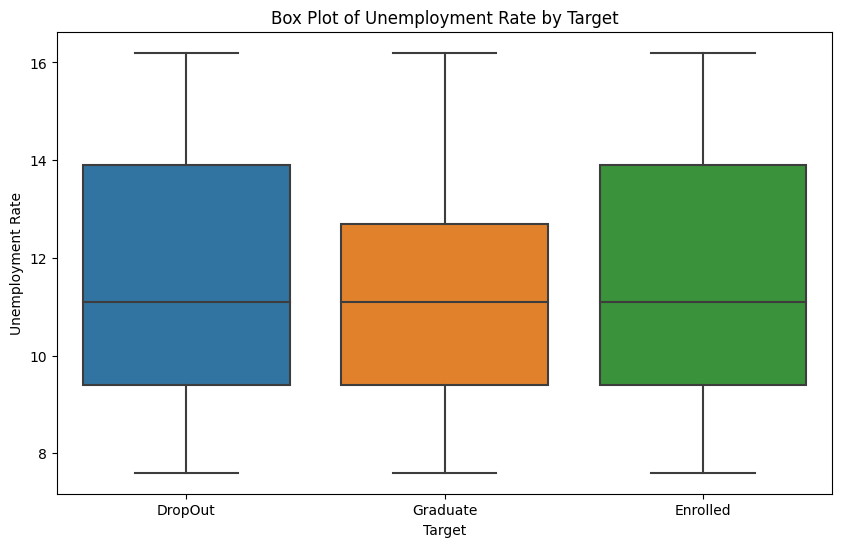

In [290]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Unemployment rate', data=new_df)
plt.title('Box Plot of Unemployment Rate by Target')
plt.xlabel('Target')
plt.xticks(ticks=[0, 1, 2], labels=['DropOut', 'Graduate', 'Enrolled'])
plt.ylabel('Unemployment Rate')
plt.show()

<Figure size 1200x800 with 0 Axes>

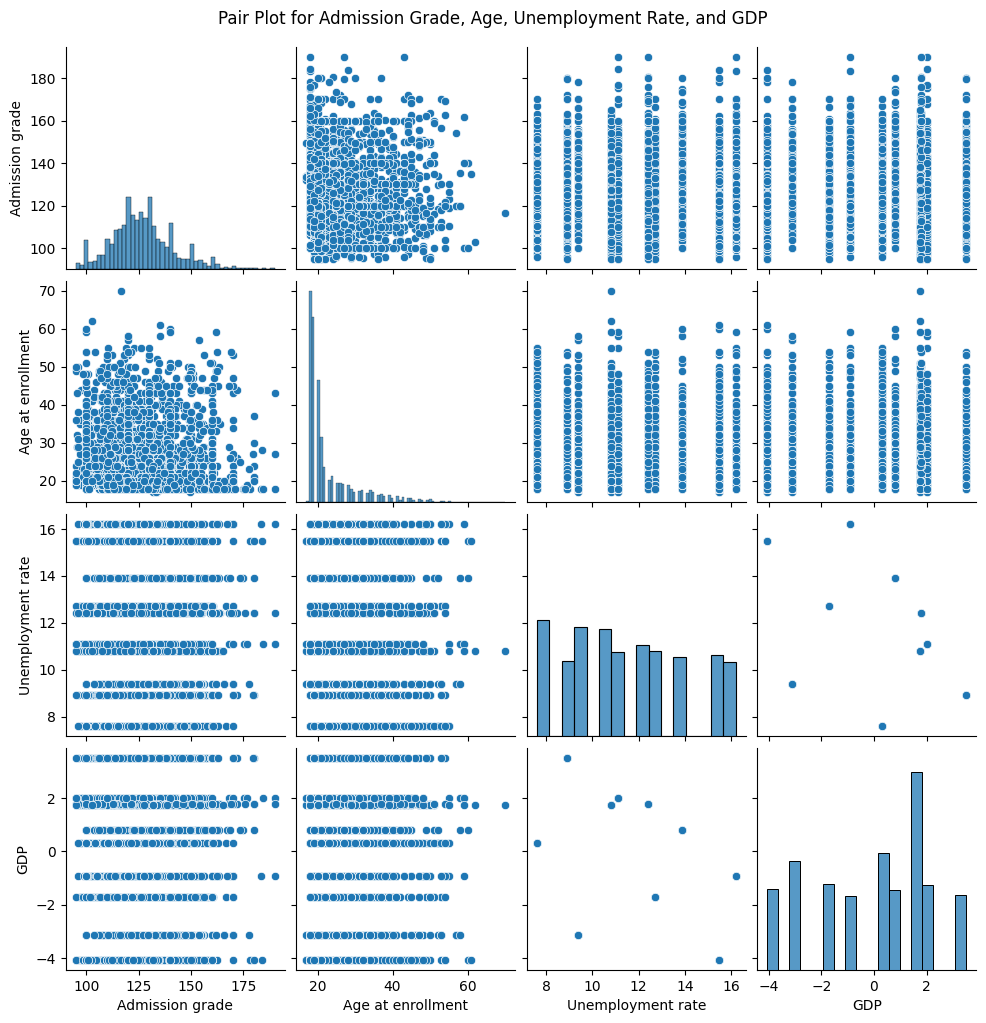

In [291]:
selected_columns = ['Admission grade', 'Age at enrollment', 'Unemployment rate', 'GDP']
selected_df = new_df[selected_columns]
plt.figure(figsize=(12, 8))
sns.pairplot(selected_df)
plt.suptitle('Pair Plot for Admission Grade, Age, Unemployment Rate, and GDP', y=1.02)
plt.show()

<h2>Clustering</h2>


K-Means

In [292]:
X = new_df.iloc[:, :-1].values

In [293]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

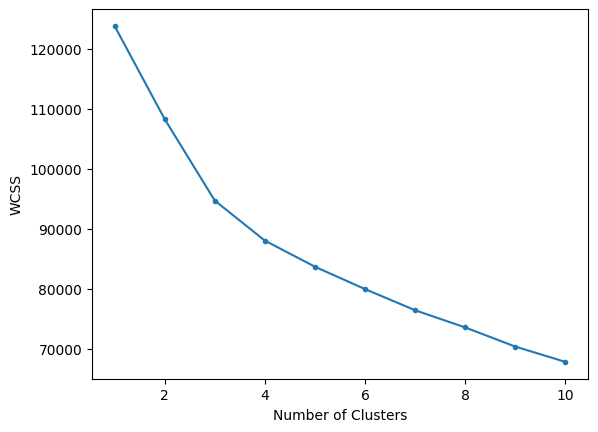

In [294]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, max_iter=500, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [295]:
findknee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = findknee.elbow
print("The best k for your model is ", optimal_k)

The best k for your model is  4


In [296]:
kmeans_optimal = KMeans(n_clusters=optimal_k, max_iter=500, random_state=42)
labels = kmeans_optimal.fit_predict(X_scaled)
new_df['Cluster'] = labels
cluster_counts = new_df['Cluster'].value_counts()
print("\nNumber of Data Points in Each Cluster:")
print(cluster_counts)


Number of Data Points in Each Cluster:
1    3202
2     811
3     264
0     147
Name: Cluster, dtype: int64


/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hierachical CLustering

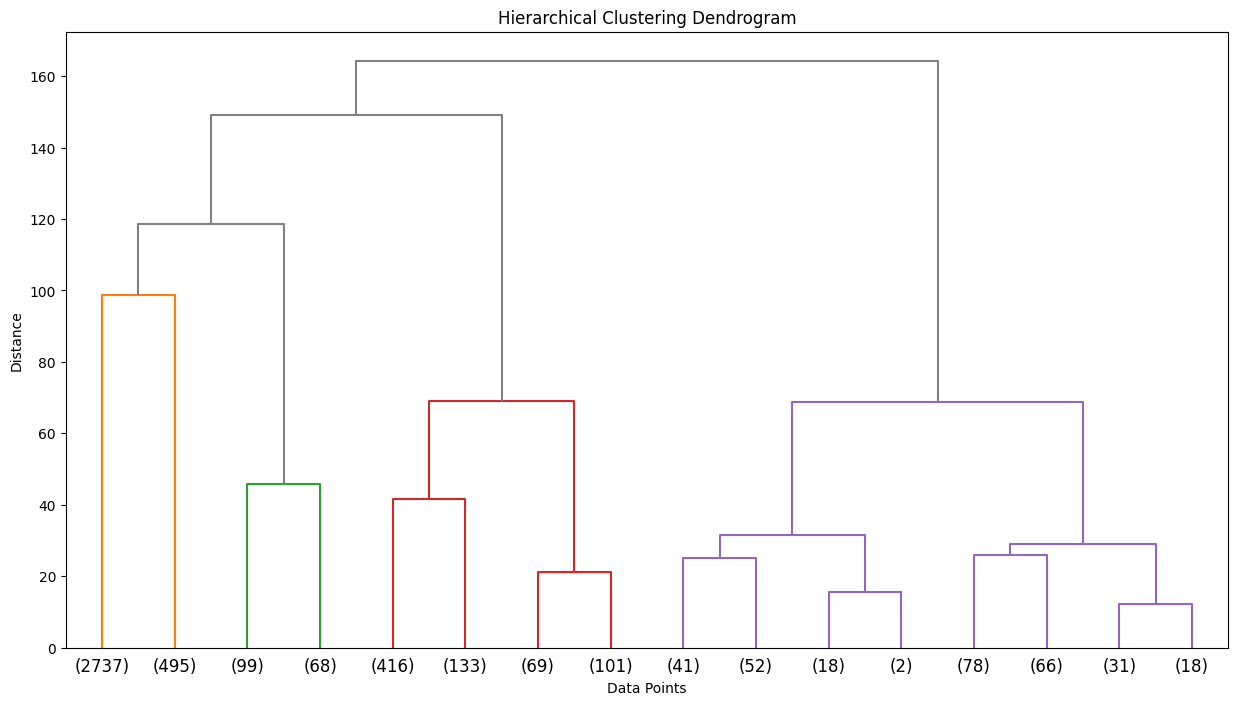

In [297]:
Z = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='level', p=3, orientation='top', color_threshold=None, above_threshold_color='grey', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Create a prediction model using any classification algorithm and compare the results

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, new_df['Target'], test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [299]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [300]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[231  32  53]
 [ 39  41  71]
 [ 21  19 378]]


In [301]:
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       316
           1       0.45      0.27      0.34       151
           2       0.75      0.90      0.82       418

    accuracy                           0.73       885
   macro avg       0.66      0.64      0.64       885
weighted avg       0.72      0.73      0.72       885



### Comparison:

- The clustering method divides the data into distinct clusters without using class labels.
- The classification method (logistic regression) predicts class labels based on labeled data.
- The cluster counts in the clustering method provide information about the distribution of data across clusters.
- The classification method evaluates performance using accuracy, confusion matrix, and a classification report.